In [101]:
import sys
import importlib

import numpy as np
import pandas as pd
import os.path

# Import the model we are using
import seaborn as sns
import matplotlib.pyplot as plt

import BTSSlayers as btss
importlib.reload(btss)


<module 'BTSSlayers' from '/users/kent/mcarl6/python/github/Behavioral-Translation-Style-Space/BTSSlayers.py'>

In [97]:
# set dataframe vizualisation options 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Generate BTSS 

generate the BTSS layers for all sessions in all studies and write:
-  to the btssDir, if directory name is provided
-  to the CRITT TPR-DB if p=1


In [99]:
studies = ['ACS08', 'ADU17', 'AE17', 'ALG14', 'AR22', 'ATJA22', 'ATZH22', 'AU20', 'BACK2020', 'BB17', 'BD08', 'BD13', 'BITEXT_07092023', 'BML12', 'BML12_MT_SA', 'BML12_MT_SI', 'BML12_MT_SM', 'BML12_NTO_SA', 'BML12_NTO_SI', 'BML12_NTO_SM', 'BML12_re', 'BML12_SA', 'BML12_SI', 'BML12_SM', 'CEMPT13', 'CET6', 'CPH17', 'CREATIVE', 'CREATIVE2', 'CS19', 'DG01', 'DG21', 'DG21error', 'EFT14', 'ENDU20', 'ENDU20-MT', 'ENJA15', 'ENTP19', 'ESMT19', 'GS12', 'GV18', 'HE17', 'HF12', 'HLR13', 'HNUJd', 'HNUJml', 'HNUJms', 'IMBi18', 'IMBi18bolt', 'IMBst18', 'IMBst18bolt', 'JAMT19', 'JIN15', 'JLG10', 'JN13', 'JTD16', 'KTHJ08', 'lecontra', 'LiTian2019New', 'LWB09', 'MAecho2019', 'MP16', 'MPM16', 'MS12', 'MS13', 'NEUROTRAD_3', 'NJ12', 'OCT13', 'PFT13', 'PFT14', 'predict20', 'predict20-MT', 'RH12', 'ROBOT14', 'RUC16', 'RUC17', 'RUCMT17', 'SG12', 'SJM16', 'SPC15', 'ST19', 'STC17', 'STC17bolt', 'STML18', 'STML18bolt', 'TDA14', 'WARDHA13', 'XIANG19', 'ZHMT19', 'ZHPT12']

btss.writeBTSS(studies, btssDir="BTSS", p=1, verbose=1)


Directory 'BTSS' already exists.
Writing: ACS08
Writing: ADU17
Writing: AE17
Writing: ALG14
Writing: AR22
Writing: ATJA22
Writing: ATZH22
Writing: AU20
Writing: BACK2020
Writing: BB17
Writing: BD08
Writing: BD13
Writing: BITEXT_07092023
Writing: BML12
Writing: BML12_MT_SA
Writing: BML12_MT_SI
Writing: BML12_MT_SM
Writing: BML12_NTO_SA
Writing: BML12_NTO_SI
Writing: BML12_NTO_SM
Writing: BML12_SA
Writing: BML12_SI
Writing: BML12_SM
Writing: BML12_re
Writing: CET6
Writing: CPH17
Writing: CREATIVE
Writing: CREATIVE2
Writing: CS19
Writing: DG01
Writing: DG21
Writing: DG21error
Writing: EFT14
Writing: ENDU20
Writing: ENDU20-MT
Writing: ENJA15
Writing: ENTP19
Writing: ESMT19
Writing: GS12
Writing: GV18
Writing: HE17
Writing: HF12
Writing: HLR13
Writing: HNUJd
Writing: HNUJml
Writing: HNUJms
Writing: IMBi18
Writing: IMBi18bolt
Writing: IMBst18
Writing: IMBst18bolt
Writing: JAMT19
Writing: JIN15
Writing: JLG10
Writing: JN13
Writing: JTD16
Writing: KTHJ08
Writing: LWB09
Writing: LiTian2019New
W

# Read BTSS layers from the BTSS directory

In [104]:
# read from the BTSS directory
studies = ['AR22', 'BML12', 'SG12']

BTSS = btss.readBTSS(studies, btssDir='BTSS')

# rename layers for easier usage
AUdf = BTSS['au']
KBdf = BTSS['kb'] 
PUdf  = BTSS['pu']
HOFdf  = BTSS['hof']
POLdf = BTSS['pol']
PHdf  = BTSS['ph']

Reading: AR22
Reading: BML12
Reading: SG12


## inspect BTSS 

In [105]:
AUdf.head()

,Id,Study,Session,SL,TL,Task,Text,Part,Time,Phase,Type,Dur,SGid,SGnbr,TGid,TGnbr,Ins,Del,PosS,PosT,Scatter,CrossS,CrossT,Gram5,GazePath,FixS,TrtS,FixT,TrtT,KBI,PUB,Edit,ProbSgaze,ProbTgaze,ProbCgaze,ProbSTCgaze,HSgaze,HTgaze,HCgaze,HSTCgaze,StudySession,End,Dur_L,Dur_R,Dur_S,Dur_N,STs_TTs,NextTime,Total_Dur,One,MaxDur,RelDur_L,RelDur_R,RelDur_S,RelDur_N,GPlabel,KBtype,PUnbr,PUdur,KBnbr,KBdur,HOF,WperFix,HOFnbr,Tstyles,LogDur,LogDur_L,LogDur_R,LogDur_S,LogIns,LogDel,LogKBI,LogPUB
0,1,AR22,P01_P3,en,ar,P,3,P01,77,O,1,594,---,0,---,0,0,0,---,---,0.0,0.0,0.0,10000,S:60+S:60+T:58,2,283,1,0,400,1000,---,0.8947,0.3333,0.6491,0.3158,0.5511,2.7733,1.3938,2.8581,AR22-P01_P3,671,0,289,0,305,1,671.0,594,1,594,0.0,0.486532,0.000,0.513468,RN,P,1,26392,1,26392,O,0.250000,1,0,6.388561,0.0,5.669881,0.000000,0.0,0.0,5.993961,6.908755
1,2,AR22,P01_P3,en,ar,P,3,P01,671,O,2,1297,---,0,---,0,0,0,---,---,0.0,0.0,0.0,21000,T:58+T:16+T:1+T:2+S:7,1,0,4,1112,400,1000,---,0.9474,0.6421,0.7895,0.5474,0.2711,1.4949,1.0144,1.9441,AR22-P01_P3,1968,0,0,1297,0,4,1968.0,1297,1,1297,0.0,0.000000,1.000,0.000000,S,P,1,26392,1,26392,R,0.666667,2,0,7.168580,0.0,0.000000,7.168580,0.0,0.0,5.993961,6.908755
2,3,AR22,P01_P3,en,ar,P,3,P01,1968,O,1,167,---,0,---,0,0,0,---,---,0.0,0.0,0.0,12100,T:2+S:7,1,167,1,7,400,1000,---,0.9737,0.6316,0.8421,0.5526,0.1487,1.3989,0.8700,1.8171,AR22-P01_P3,2135,0,0,167,0,1,2135.0,167,1,167,0.0,0.000000,1.000,0.000000,S,P,1,26392,1,26392,R,0.333333,2,0,5.123964,0.0,0.000000,5.123964,0.0,0.0,5.993961,6.908755
3,4,AR22,P01_P3,en,ar,P,3,P01,2135,O,8,5505,---,0,---,0,0,0,---,---,0.0,0.0,0.0,81210,---,0,0,0,0,400,1000,---,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,AR22-P01_P3,7640,0,0,0,5505,0,7640.0,5505,1,5505,0.0,0.000000,0.000,1.000000,N,P,1,26392,1,26392,R,0.000000,2,0,8.613594,0.0,0.000000,0.000000,0.0,0.0,5.993961,6.908755
4,5,AR22,P01_P3,en,ar,P,3,P01,7640,O,2,250,---,0,---,0,0,0,---,---,0.0,0.0,0.0,28121,T:45+S:56,1,0,1,217,400,1000,---,0.6316,0.3947,0.5000,0.3421,0.6337,2.4686,1.1766,2.8384,AR22-P01_P3,7890,0,0,217,33,1,7890.0,250,1,250,0.0,0.000000,0.868,0.132000,S,P,1,26392,1,26392,R,0.333333,2,0,5.525453,0.0,0.000000,5.384495,0.0,0.0,5.993961,6.908755


In [74]:
KBdf.head()

,StudySession,KBnbr,Time,Dur,Ins,Del,Tstyles,KBtype,KBseq,PUnbr,...,AUcount,LogDur,Study,Session,Id,SL,TL,Task,Text,Part
0,ENJA15-P27_D2,1,2796,2618,0,0,0,P,-,1,...,2,7.870548,ENJA15,P27_D2,1,en,ja,D,2,P27
1,ENJA15-P27_D2,2,8032,1,7,0,0,I,I,2,...,1,0.693147,ENJA15,P27_D2,2,en,ja,D,2,P27
2,ENJA15-P27_D2,3,8033,1084,0,0,0,P,-,3,...,5,6.989335,ENJA15,P27_D2,3,en,ja,D,2,P27
3,ENJA15-P27_D2,4,13453,1,5,0,0,I,I,4,...,1,0.693147,ENJA15,P27_D2,4,en,ja,D,2,P27
4,ENJA15-P27_D2,5,13454,5546,0,0,0,P,-,5,...,1,8.621013,ENJA15,P27_D2,5,en,ja,D,2,P27


In [94]:
PUdf.head()

,StudySession,PUnbr,Time,Dur,Ins,Del,Tstyles,PUtype,KBseq,KBcount,HOFset,HOFnbr,LogDur
0,BML12-P01_T1,1,280,91736,0,0,0,000,-,54,HO,4,11.426681
1,BML12-P01_T1,2,92016,3656,25,1,0,305,IIICCCCC,10,F,5,8.204398
2,BML12-P01_T1,3,95672,547,0,0,0,000,-,1,H,6,6.306275
3,BML12-P01_T1,4,96219,797,0,6,0,010,D,1,H,6,6.682109
4,BML12-P01_T1,5,97016,937,0,0,0,000,-,1,H,6,6.843750


In [107]:
HOFdf.tail()


,StudySession,HOFnbr,Time,Dur,Ins,Del,Tstyles,HOF,KBseq,KBcount,Dur_L,Dur_R,Dur_S,Dur_N,Study,Session,Id,SL,TL,Task,Text,Part,LogDur,SfixDiff,SfixTot,TfixDiff,TfixTot,SfixRel,TfixRel,RelDur_L,RelDur_R,RelDur_S,RelDur_N,LogDur_L,LogDur_R,LogDur_S,LogDur_N,SfixLogOdds,TfixLogOdds,HOFtype,PUcount,HOFset,Odur,Hdur,Fdur,Rdur
32737,SG12-P24_T3,120,809722,19894,0,0,0,R,-,8,5849,4403,7085,2557,SG12,P24_T3,40,en,de,T,3,P24,9.898224,1,3,47,123,0.333333,0.382114,0.294008,0.221323,0.356138,0.128531,8.674197,8.390268,8.865876,7.846981,-0.693147,-0.480586,NaN,NaN,NaN,0,0,0,19894
32738,SG12-P24_T3,121,829616,10058,0,0,0,H,-,4,0,497,327,9234,SG12,P24_T3,40,en,de,T,3,P24,9.216223,3,3,1,2,1.000000,0.500000,0.000000,0.049413,0.032511,0.918075,0.000000,6.210600,5.793014,9.130756,inf,0.000000,NaN,NaN,NaN,0,10058,0,0
32739,SG12-P24_T3,122,839674,999,0,0,0,R,-,1,0,990,0,9,SG12,P24_T3,40,en,de,T,3,P24,6.907755,1,1,4,5,1.000000,0.800000,0.000000,0.990991,0.000000,0.009009,0.000000,6.898715,0.000000,2.302585,inf,1.386294,NaN,NaN,NaN,0,0,0,999
32740,SG12-P24_T3,123,840673,2808,0,0,0,O,-,5,760,758,689,601,SG12,P24_T3,41,en,de,T,3,P24,7.940584,8,11,3,5,0.727273,0.600000,0.270655,0.269943,0.245370,0.214031,6.634633,6.632002,6.536692,6.400257,0.980829,0.405465,NaN,NaN,NaN,2808,0,0,0
32741,SG12-P24_T3,124,843481,1355,0,0,0,H,-,1,956,116,283,0,SG12,P24_T3,41,en,de,T,3,P24,7.212294,0,0,4,6,NaN,0.666667,0.705535,0.085609,0.208856,0.000000,6.863803,4.762174,5.648974,0.000000,NaN,0.693147,0.0,1.0,{'HOR'},0,1355,0,0


In [75]:
POLdf.head()

,StudySession,Id,Time,Tstyles,Dur,Odur,Hdur,Rdur,Fdur,Ins,...,RelDur_R,RelDur_S,RelDur_N,D,O,H,R,F,I,DOHRFI
0,ENJA15-P27_D2,1,2796,0,30298,5237,0,0,25061,26,...,0.383194,0.451680,0.165126,2,0,0,0.0,0.0,0.0,200000
1,ENJA15-P27_D2,2,33094,0,24218,3782,7530,0,12906,8,...,0.000000,0.000000,0.461186,1,0,0,0.0,0.0,1.0,100001
2,ENJA15-P27_D2,3,57312,0,47765,42182,5583,0,0,37,...,0.075495,0.236386,0.235402,2,2,0,0.0,0.0,0.0,220000
3,ENJA15-P27_D2,4,105077,0,31211,21079,7406,2726,0,30,...,0.253148,0.245811,0.201403,2,2,0,0.0,0.0,0.0,220000
4,ENJA15-P27_D2,5,136288,0,17853,4586,0,3533,9734,11,...,0.529323,0.000000,0.265838,1,1,0,1.0,0.0,1.0,110101


In [355]:
PHdf.head()

,StudySession,Phase,Time,Dur,Tstyles,HOFseq,HOFnbr,Ins,Del,TotalDur,TotalLogDur,LogDur,RelDur
0,ACS08-P01_T3,D,6457,584869,4,FHORHFHFRHFROFOFOHFOFORFOHFOHFOFOHOHORHFHROROR...,1059,1221,287,627661,13.349755,13.279145,0.931823
1,ACS08-P01_T3,O,943,5514,4,O,1,0,0,627661,13.349755,8.615227,0.008785
2,ACS08-P01_T3,R,591326,37278,4,FRHFHFHR,31,31,19,627661,13.349755,10.526185,0.059392
3,ACS08-P01_T4,D,7170,398980,4,FOROFRFORFRHOFOFOROROFOFOFOHFROFRHFOFRFROHFRFO...,815,1010,159,480898,13.083410,12.896669,0.829656
4,ACS08-P01_T4,O,159,7011,4,O,3,0,0,480898,13.083410,8.855378,0.014579


# HOF analysis

## LogOdds of ST / TT Fixations per HOF state

chances of how often a word is refixated:
- logOdds = 0: 50% refixation chance
- logOdds > 0: refixation chance > 50%
- logOdds < 0: refixation chance < 50%

it's computed as:

- $fixLogOdds = \mathrm{logit} (fixRel)= \log (\frac {fixRel}{1-fixRel})$

where:
- $fixRel$: number different ST or TT words fixated  $ fixRel= \frac{fixDiff}{fixTot}$

and
- $fixDiff$: number different ST / TT words fixated
- $fixTot$: total number of ST /TT fixations per HOF state


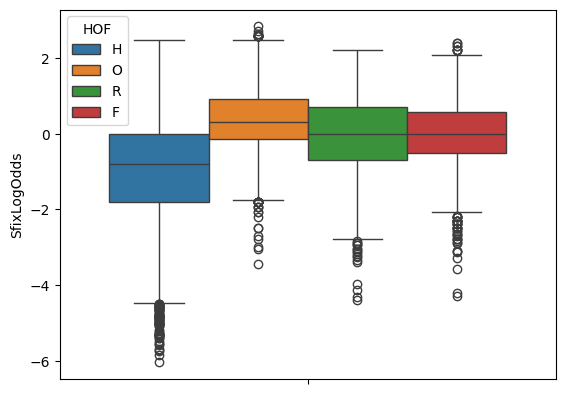

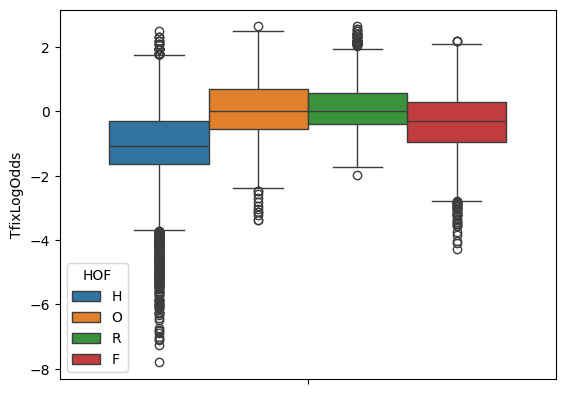

In [106]:
desired_order = ["H", "O", "R", "F"]

sns.boxplot(data=HOFdf, y='SfixLogOdds' , hue='HOF', hue_order=desired_order )
plt.show()

#H = HOFdf[HOFdf['TfixLogOdds'].notna()]
sns.boxplot(data=HOFdf, y='TfixLogOdds' , hue='HOF', hue_order=desired_order )
plt.show()

#sns.lmplot(data=AU1, x="KBI", y="PUB", hue='TL',  scatter_kws={"s": 10})
#sns.boxplot(data=AU1[(AU1.Study.isin(['BML12']))], y="LogPUB", x="TL", hue='Tstyles')


## Distribution of HOF state 
- duration for
- insertions
- deletions
- gaze path (L, R, S)

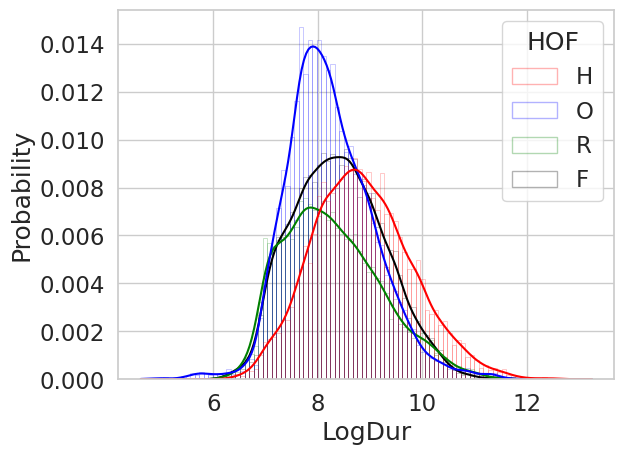

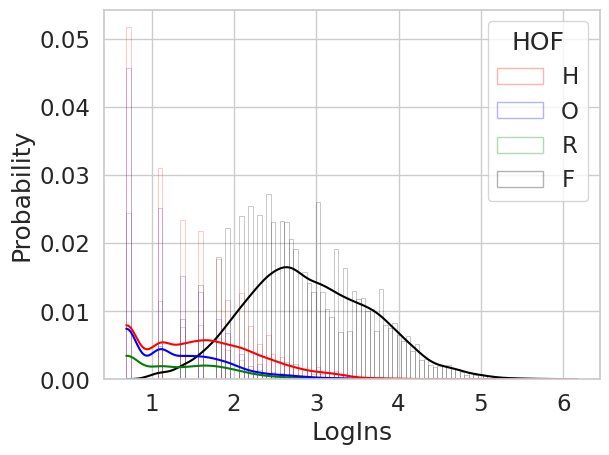

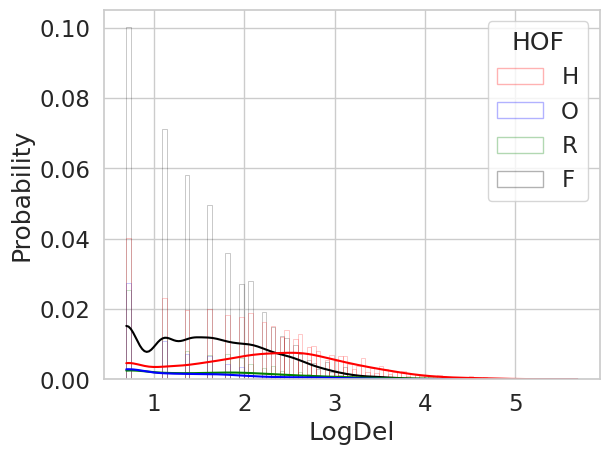

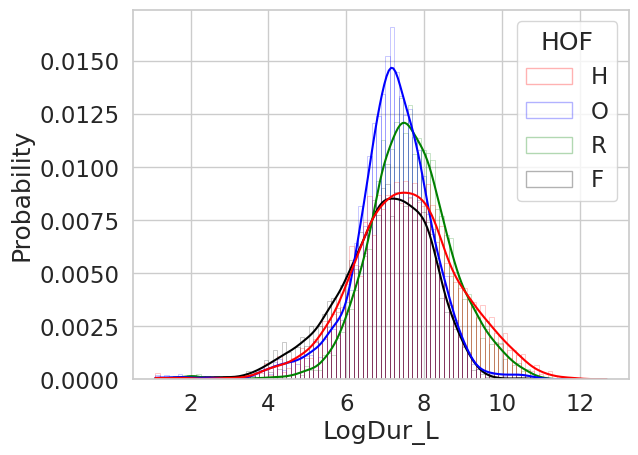

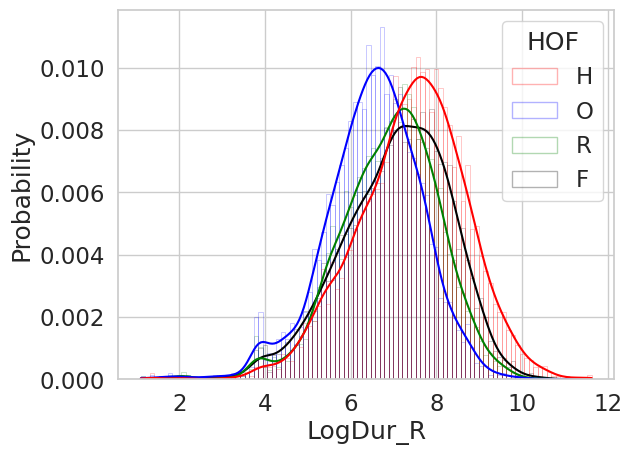

<Axes: xlabel='LogDur_S', ylabel='Probability'>

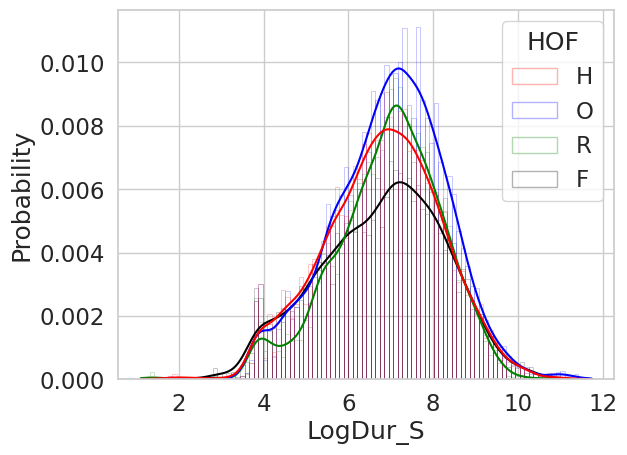

In [114]:

HOF_order = ["H", "O", "R", "F"]
palette = ["red","blue","green", "black"]

HOFdf['LogIns'] = np.log(HOFdf['Ins'] + 1)
HOFdf['LogDel'] = np.log(HOFdf['Del'] + 1)

AU1 = HOFdf[HOFdf.Dur > 1]
sns.histplot(data=AU1, x="LogDur", bins=100, alpha=0.3, hue='HOF', fill=False, kde=True, stat="probability", 
             palette=palette, hue_order=HOF_order )
plt.show()

AU1 = HOFdf[(HOFdf.LogIns > 0)]
sns.histplot(data=AU1, x="LogIns", bins=100, alpha=0.3, hue='HOF', kde=True, fill=False, stat="probability", 
             palette=palette, hue_order=HOF_order)
plt.show()

#AU1 = HOFdf[(HOFdf.Del > 0) & (HOFdf.HOF.isin(['H','F']))]
AU1 = HOFdf[(HOFdf.LogDel > 0)]
sns.histplot(data=AU1, x="LogDel", bins=100, alpha=0.3, hue='HOF', kde=True, fill=False, stat="probability", 
             palette=palette, hue_order=HOF_order)
plt.show()

AU1 = HOFdf[HOFdf.LogDur_L > 1]
sns.histplot(data=AU1, x="LogDur_L", bins=100, alpha=0.3, hue='HOF', kde=True, fill=False, stat="probability", 
             palette=palette, hue_order=HOF_order)
plt.show()

AU1 = HOFdf[HOFdf.LogDur_R > 1]
sns.histplot(data=AU1, x="LogDur_R", bins=100, alpha=0.3, hue='HOF', kde=True, fill=False, 
             stat="probability", palette=palette, hue_order=HOF_order)
plt.show()

AU1 = HOFdf[HOFdf.LogDur_S > 1]
sns.histplot(data=AU1, x="LogDur_S", bins=100, alpha=0.3, hue='HOF', kde=True, fill=False, 
             stat="probability", palette=palette, hue_order=HOF_order)


## Gaze Duration

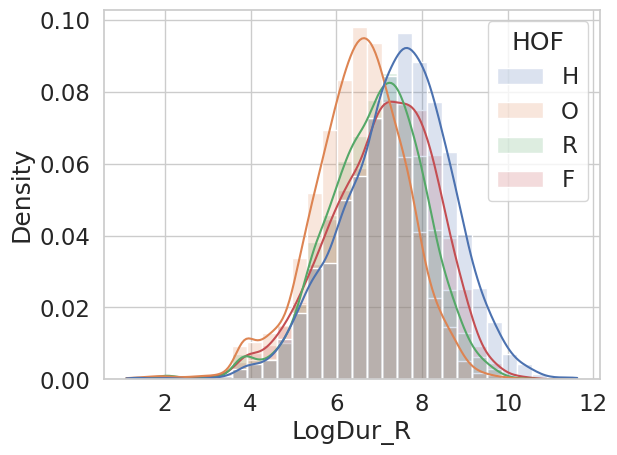

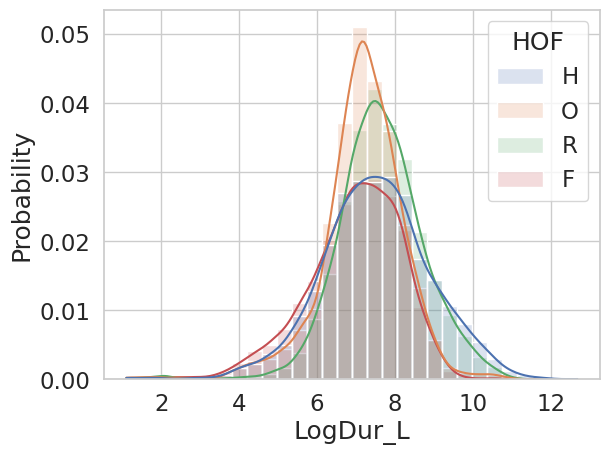

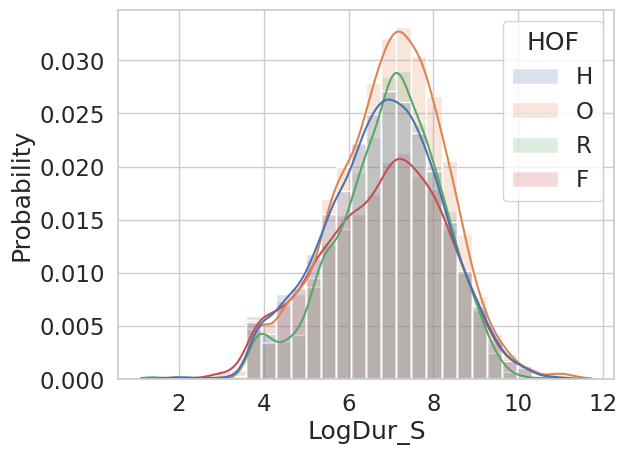

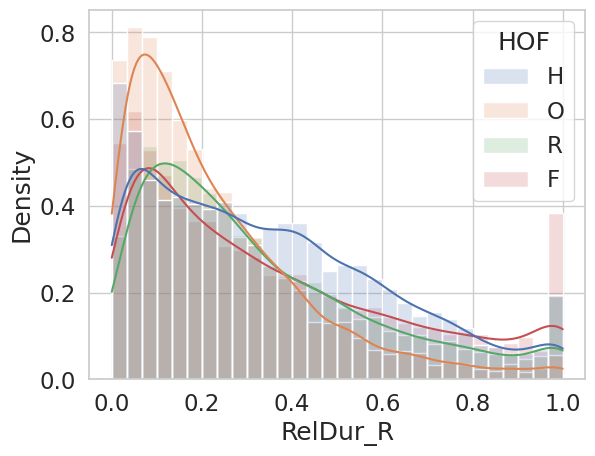

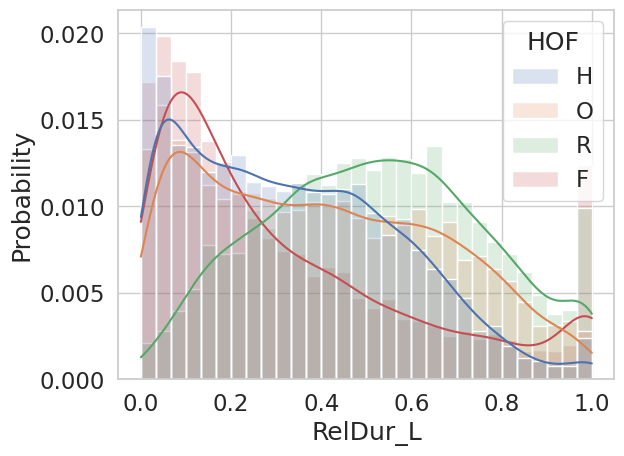

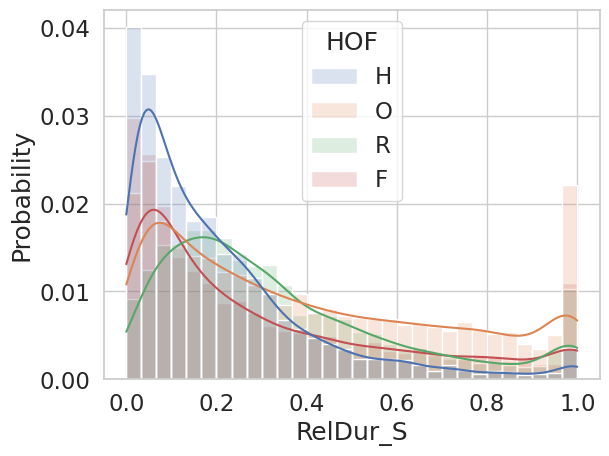

In [116]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

desired_order = ["H", "O", "R","F"]

H = HOFdf[HOFdf.LogDur_R > 1]
sns.histplot(data=H, x="LogDur_R", bins=30, hue='HOF', alpha=0.2, stat="density", kde = True, hue_order=desired_order )
plt.show()

H = HOFdf[HOFdf.LogDur_L > 1]
sns.histplot(data=H, x="LogDur_L", bins=30, hue='HOF', alpha=0.2, stat="probability", kde = True, hue_order=desired_order)
plt.show()

H = HOFdf[HOFdf.LogDur_S > 1]
sns.histplot(data=H, x="LogDur_S", bins=30, hue='HOF', alpha=0.2, stat="probability", kde = True, hue_order=desired_order)
plt.show()

H = HOFdf[HOFdf.RelDur_R > 0]
sns.histplot(data=H, x="RelDur_R", bins=30, hue='HOF', alpha=0.2, stat="density", kde = True, hue_order=desired_order )
#plt.title(title="Type 1 reading per HOF states")
plt.show()

H = HOFdf[HOFdf.RelDur_L > 0]
sns.histplot(data=H, x="RelDur_L", bins=30, hue='HOF', alpha=0.2, stat="probability", kde = True, hue_order=desired_order  )
plt.show()

H = HOFdf[HOFdf.RelDur_S > 0]
sns.histplot(data=H, x="RelDur_S", bins=30, hue='HOF', alpha=0.2, stat="probability", kde = True, hue_order=desired_order  )
plt.show()

